In [66]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=1c1e2ca62d5f17a5e29a2c57b2cbf2904eed79d210a26a9aebe1c840979bf5b6
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=50dc1d2ca39ca7b16bf868b0c24bacec7b3a81e32273793c424e3acd35e11485
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [1]:
import json
import ast
import numpy as np
from umap import UMAP
from sklearn.decomposition import PCA

In [2]:
#read in dataset: embeddings.json comes from run_esm.ipynb

with open('embeddings.json', 'r') as f:
    data = json.load(f)

In [3]:
def string2list(string:str)->list:
  """ reads a JSON where the embeddings are stored as a long string"""
  return [float(x) for x in string.split()]

In [12]:
subset = list(data.keys())
lists = []
for i in subset:
  datum = data[i]
  entry = string2list(datum)
  lists.append(entry)

dataset = np.array(lists)

In [13]:
# Create a PCA object
pca = PCA(n_components=4)

# Fit the PCA object to the data
pca.fit(dataset)

# Transform the data
transformed_data = pca.transform(dataset)

# Print the first four principal components
print(pca.components_[:4])

[[ 0.01852333  0.00313994 -0.01018981 ...  0.00793524 -0.02958589
   0.01539504]
 [-0.00683614  0.0119055  -0.00638277 ...  0.01843807 -0.00432805
  -0.02328929]
 [ 0.00114344 -0.00689913  0.00908759 ...  0.01649119 -0.04531676
  -0.02648549]
 [ 0.01733575  0.00582906  0.01520748 ...  0.00543403 -0.0426789
   0.0032185 ]]


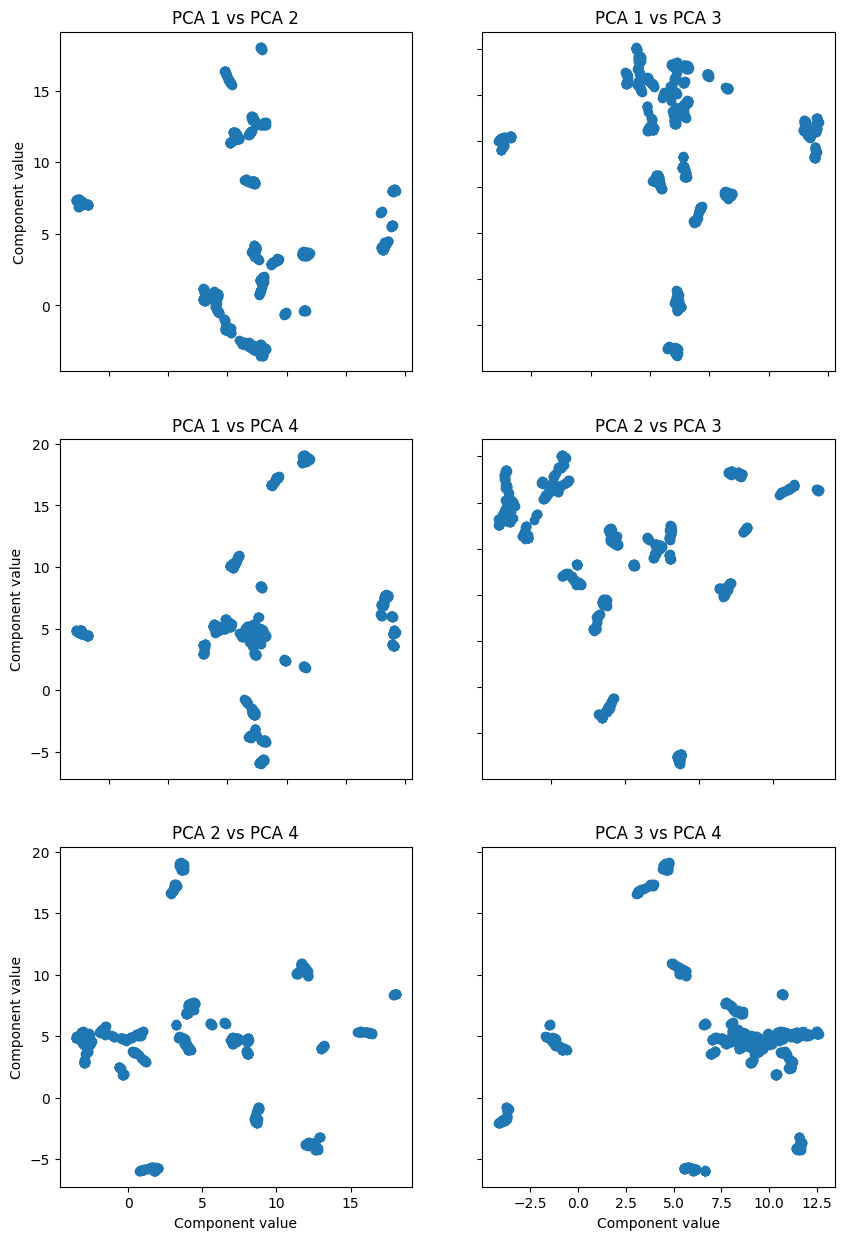

In [20]:
import matplotlib.pyplot as plt

# Create a new figure with 6 subplots arranged in 3 rows and 2 columns
fig, axs = plt.subplots(3, 2, figsize=(10, 15))

# Create scatter plots for each pair of principal components
axs[0, 0].scatter(transformed_data[:, 0], transformed_data[:, 1])
axs[0, 0].set_title('PCA 1 vs PCA 2')

axs[0, 1].scatter(transformed_data[:, 0], transformed_data[:, 2])
axs[0, 1].set_title('PCA 1 vs PCA 3')

axs[1, 0].scatter(transformed_data[:, 0], transformed_data[:, 3])
axs[1, 0].set_title('PCA 1 vs PCA 4')

axs[1, 1].scatter(transformed_data[:, 1], transformed_data[:, 2])
axs[1, 1].set_title('PCA 2 vs PCA 3')

axs[2, 0].scatter(transformed_data[:, 1], transformed_data[:, 3])
axs[2, 0].set_title('PCA 2 vs PCA 4')

axs[2, 1].scatter(transformed_data[:, 2], transformed_data[:, 3])
axs[2, 1].set_title('PCA 3 vs PCA 4')

# Add labels for x and y axes
for ax in axs.flat:
    ax.set(xlabel='Component value', ylabel='Component value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# Display the plot
plt.show()


In [14]:
# Create a UMAP object
umap = UMAP(n_components=4)

# Fit the UMAP object to the data
umap.fit(dataset)

# Transform the data
transformed_data = umap.transform(dataset)

# Print the first four principal components
print(umap.embedding_[:4])

[[ 7.4543266  3.9750154 -1.1529404  4.19607  ]
 [ 7.094796   3.8360252 -1.170129   4.776591 ]
 [ 9.263856   3.182785   3.8669324 17.322346 ]
 [ 7.373787   3.9294772 -1.0451858  4.193758 ]]


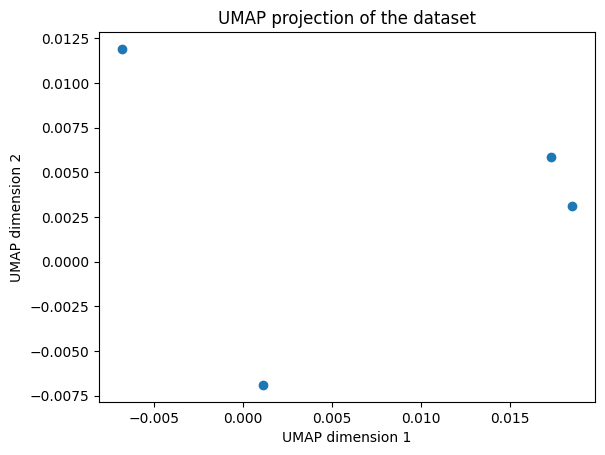

In [19]:
import matplotlib.pyplot as plt

# Assuming 'embedding' is the output of your UMAP transformation

# Create a new figure
plt.figure()

# Create a scatter plot of the UMAP output
plt.scatter(pca.components_[:, 0], pca.components_[:, 1])

# Add title and labels (optional)
plt.title('UMAP projection of the dataset')
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')

# Display the plot
plt.show()


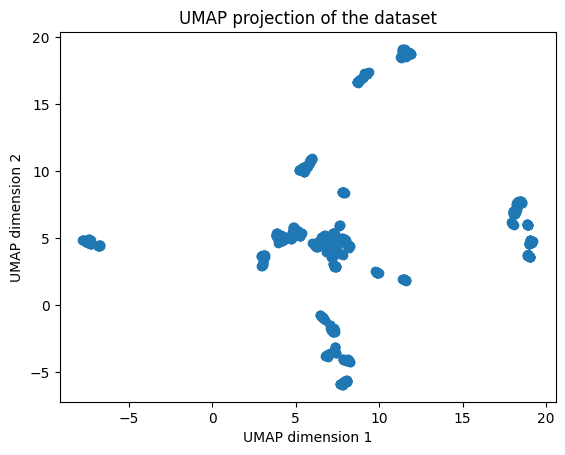

In [17]:
import matplotlib.pyplot as plt

# Assuming 'embedding' is the output of your UMAP transformation

# Create a new figure
plt.figure()

# Create a scatter plot of the UMAP output
plt.scatter(umap.embedding_[:, 0], umap.embedding_[:, 3])

# Add title and labels (optional)
plt.title('UMAP projection of the dataset')
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')

# Display the plot
plt.show()


In [ ]:
pcs = {}
for c,i in enumerate(data.keys()):
  my_list = [round(x,4) for x in list(pca.components_[:,c])]
    # Convert the numbers to strings using the map function
  string_list = map(str, my_list)

  # Join the strings with a space
  result = ' '.join(string_list)

  #store in dict
  pcs[i] = result
# Write the JSON to a file.
with open("pca.json", "w") as f:
    f.write(str(pcs))

In [49]:
umap.embedding_.shape

(964, 4)

In [52]:
umap.embedding_[1,:].shape

(4,)

In [53]:
umaps = {}
for c,i in enumerate(data.keys()):
  my_list = [round(x,4) for x in list(umap.embedding_[c,:])]
    # Convert the numbers to strings using the map function
  string_list = map(str, my_list)

  # Join the strings with a space
  result = ' '.join(string_list)

  #store in dict
  umaps[i] = result
# Write the JSON to a file.
with open("umap.json", "w") as f:
    f.write(str(umaps))